# Istanbul Shopping Trends Analysis

This project focuses on *Customer Demographic Analysis* of shopping behavior in Istanbul. Using data from 10 major malls collected between 2021 and 2023, we explore consumer demographics and shopping patterns. The dataset includes essential details like customer IDs, age, gender, payment methods, product categories, quantities, prices, and order dates. Through this analysis, we aim to uncover insights into spending habits, popular products, and seasonal trends, providing valuable information for businesses and researchers interested in Istanbul’s shopping landscape.

In [62]:
#Importing important libraries which we will use in this project.
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
import pandas_datareader as pdr

In [63]:
#Import the Data
data = pd.read_csv('customer_shopping_data.csv')


In [64]:
data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


Data Cleaning - Removing duplicate values and handling missing values

In [65]:
# Removing Duplicate Values
data=data.drop_duplicates()

This will delete the duplicate row which is only 1 Row in the entire dataset

In [66]:
data.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


In [67]:
# Categorize Age Group- We distribute the age into different agr groups to get a clear view
bins = [0, 25, 35, 45, 60, 100]
labels = ['18-25', '26-35', '36-45', '46-60', '60+']
data['Age Group'] = pd.cut(data['age'], bins=bins, labels=labels) #making a new column 'Age Group' in data

Exploratory Data Analysis (EDA) is a systematic process for analyzing data to identify patterns, relationships, and anomalies. 

In [68]:
#Calculate Basic Metrics: Average spend, min/max spend and average age.
avg_spend=data['price'].mean()
print('Avgerage spend is %d TL' %avg_spend )

max_spend=data['price'].max()
print('Maximum spend is %d TL' %max_spend )

avg_age=data['age'].mean()
print('Avgerage age is %d years' %avg_age)

Avgerage spend is 689 TL
Maximum spend is 5250 TL
Avgerage age is 43 years


In [69]:
#Group by Demographics: Analyze spending by age group and gender.

spend_by_age = data.groupby('Age Group')['price'].mean()
print(spend_by_age )

Age Group
18-25    680.042479
26-35    687.410483
36-45    699.923693
46-60    688.075510
60+      689.427523
Name: price, dtype: float64


Here We can see that the age group 36-45 spends the more then the others.


In [70]:
spend_by_gender = data.groupby('gender')['price'].mean()
print(spend_by_gender)

gender
Female    688.137615
Male      690.920933
Name: price, dtype: float64


Now here it can be seen that on average the males spend slightly more then females.

# Data Visualization

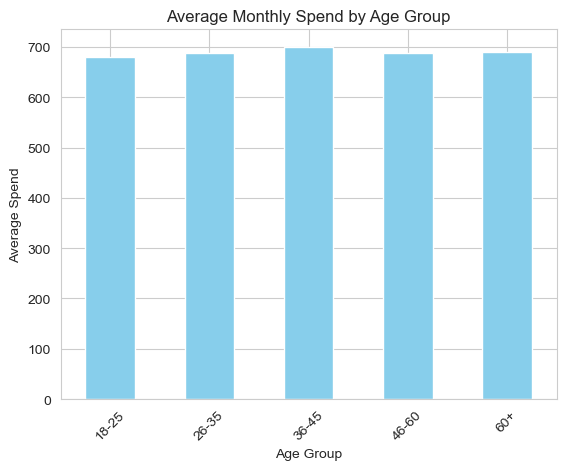

In [71]:
spend_by_age.plot(kind='bar', color='skyblue')
plt.title("Average Monthly Spend by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Spend")
plt.xticks(rotation=45)
plt.show()

In [72]:
# Age Group Analysis:
# Identify which age groups are the primary shoppers for certain product categories.

In [73]:
# Group by Age Group and Product Category, then calculate total spending for each combination
category_spending = data.groupby(['Age Group', 'category'])['price'].sum().reset_index()

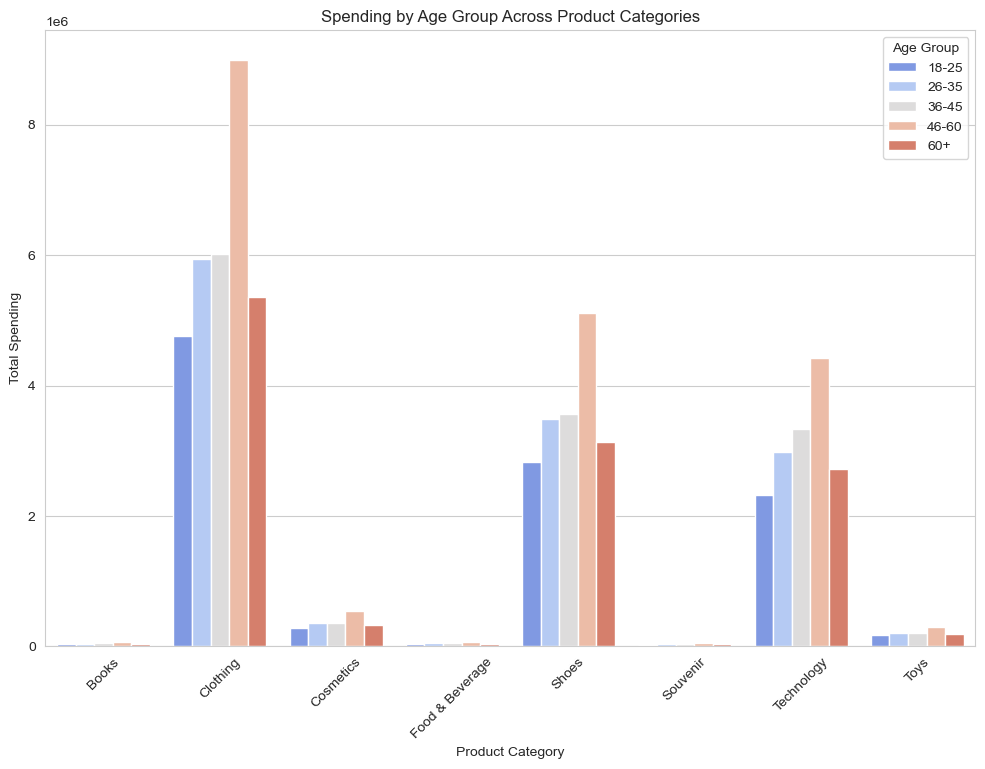

In [74]:
# This second plot shows spending patterns across product categories for each age group,
# making it easier to identify primary shoppers for specific categories.
plt.figure(figsize=(12, 8))
sns.barplot(x='category', y='price', hue='Age Group', data=category_spending, palette='coolwarm')
plt.title('Spending by Age Group Across Product Categories')
plt.xlabel('Product Category')
plt.ylabel('Total Spending')
plt.legend(title='Age Group', loc='upper right')
plt.xticks(rotation=45)
plt.show()

Look like there are 3 main category which is popular in shooping malls of Istanbul. Clothing, Shoes, & Technology are the most favourite items across all the age group.

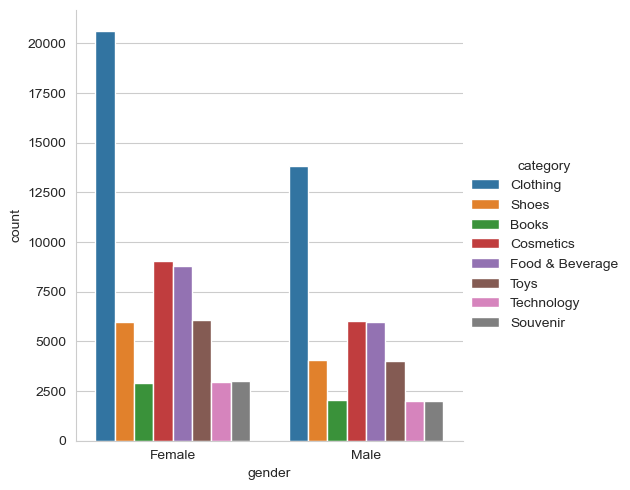

In [75]:
#Gender Vs Category
sns.catplot(x='gender',data=data,kind='count', hue='category')
#plt.title("Gender Vs Category plot")

Here we got an interesting fact that females buys more then males almost in every category,
But as we can see in Clothing, Cosmetics, and Food this are those 3 category that females like the most.  

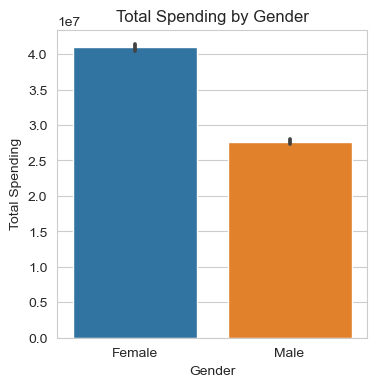

In [76]:
#Plot a bar plot to show average spending by gender
plt.figure(figsize=(4, 4))
sns.barplot(x='gender', y='price', data=data, estimator=sum)
plt.title("Total Spending by Gender")
plt.xlabel("Gender")
plt.ylabel("Total Spending")
plt.show()
#The estimator=sum parameter tells Seaborn to sum up the prices for each gender to see the total spending.

Here we can see Females spend more then males

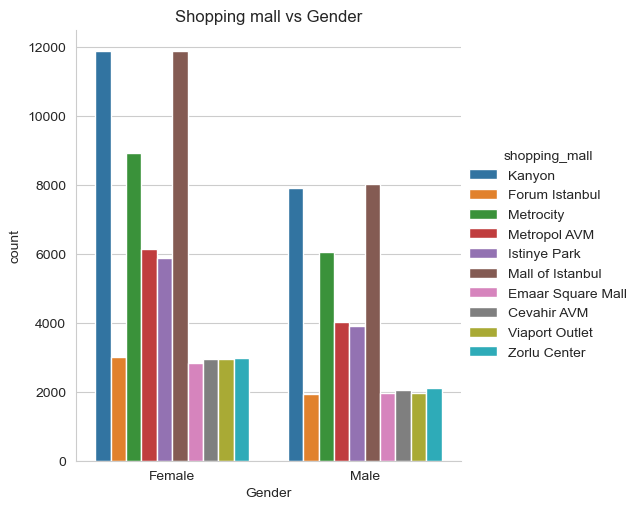

In [77]:
sns.catplot(x='gender',data=data,kind='count', hue='shopping_mall')
plt.title("Shopping mall vs Gender")
plt.xlabel("Gender")
plt.show()


This shows that two malls are famous in Istanbul amoung both M&F that is 'Kanyon' and 'Mall Of Istanbul'

In [78]:
# Now lets see the insights on payment method.

Text(0.5, 26.99999999999998, 'Gender')

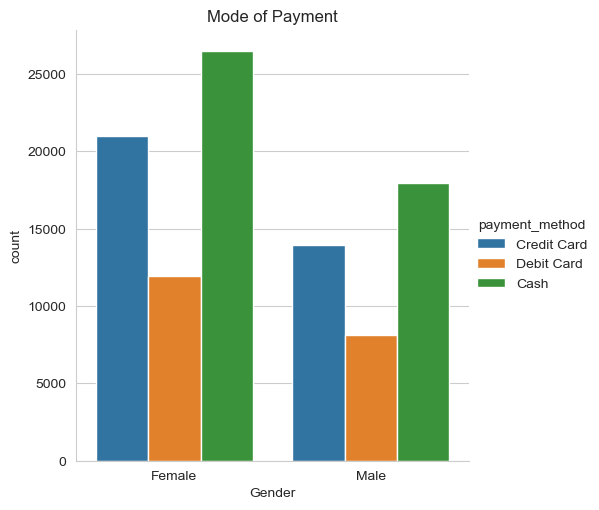

In [79]:
# Plotting a graph between mode of payment and gender.
sns.catplot(x='gender',data=data,kind='count', hue='payment_method')
plt.title('Mode of Payment')
plt.xlabel('Gender')

Here it is clearly visible that females did more number of transactions then males. And both males and females prefer to use cash or either credit card more.

In [80]:
# Now Lets look on yearly trend of shopping at different shopping mall  

In [81]:
# Convert 'Invoice Date' to datetime format
data['invoice_date'] = pd.to_datetime(data['invoice_date'], errors='coerce')

C:\Users\Admin\AppData\Local\Temp\ipykernel_11036\1456807253.py:2: UserWarning: Parsing '16/05/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['invoice_date'] = pd.to_datetime(data['invoice_date'], errors='coerce')
C:\Users\Admin\AppData\Local\Temp\ipykernel_11036\1456807253.py:2: UserWarning: Parsing '24/10/2021' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['invoice_date'] = pd.to_datetime(data['invoice_date'], errors='coerce')
C:\Users\Admin\AppData\Local\Temp\ipykernel_11036\1456807253.py:2: UserWarning: Parsing '24/05/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  data['invoice_date'] = pd.to_datetime(data['invoice_date'], errors='coerce')
C:\Users\Admin\AppData\Local\Temp\ipykernel_11036\1456807253.py:2: UserWarning: Parsing '13/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime

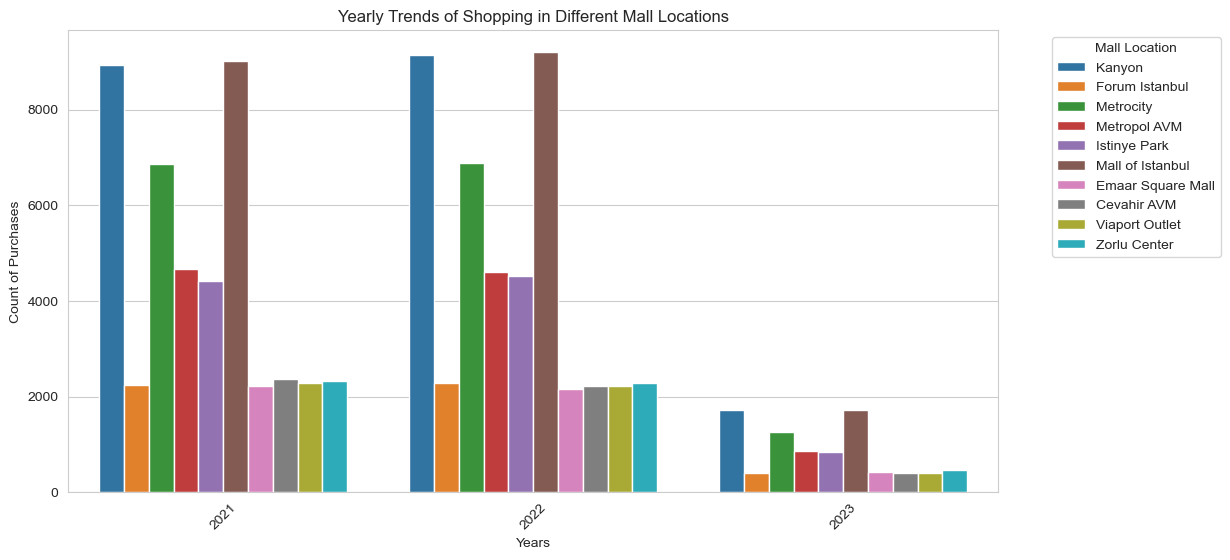

In [82]:
# Extracting year to see the trends of buying at different mall location
data['Year'] = data['invoice_date'].dt.year

# Plotting
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', hue='shopping_mall', data=data)
plt.title("Yearly Trends of Shopping in Different Mall Locations")
plt.xlabel("Years")
plt.ylabel("Count of Purchases")
plt.legend(title='Mall Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

Here we can see a major trend differnce in year 2023 where people are not buying as compare to past two years.

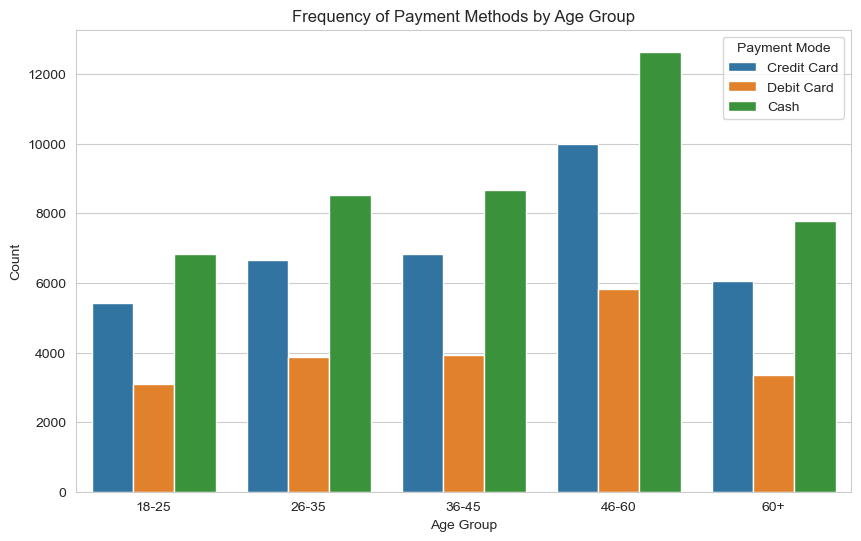

In [83]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Age Group', hue='payment_method')
plt.title('Frequency of Payment Methods by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Payment Mode')
plt.show()

Useful Inights:
1. Age Group 46-60 are more likely to spend more and many of them prefer to use cash
2. 18-25 age group do not use credit card much and cash payment is also low as compares to others, this could happen because they are youngsters and don't have a job.
3. People above 60 years do not prefer to use digital payment method.

number of people in each age group.
1. 18-25    15359
2. 26-35    19059
3. 36-45    19436
4. 46-60    28434
5. 60>       17169

# More In depth Visualizations

In [84]:
# Monthly and Seasonal Trends: Are there certain months or seasons with higher sales?

In [85]:
data['Month'] = data['invoice_date'].dt.month

In [86]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'          #Winter: December to February
    elif month in [3, 4, 5]:
        return 'Spring'          #Spring: March to May
    elif month in [6, 7, 8]:
        return 'Summer'          #Summer: June to August 
    elif month in [9, 10, 11]:
        return 'Autumn'          #Fall/Autumn: September to November

data['Season'] = data['Month'].apply(get_season)

In [87]:
# Group by Month and Season to Calculate Total Sales
monthly_sales = data.groupby('Month')['price'].sum().reset_index() # mothly sales
seasonal_sales = data.groupby('Season')['price'].sum().reset_index() # seasonal sales

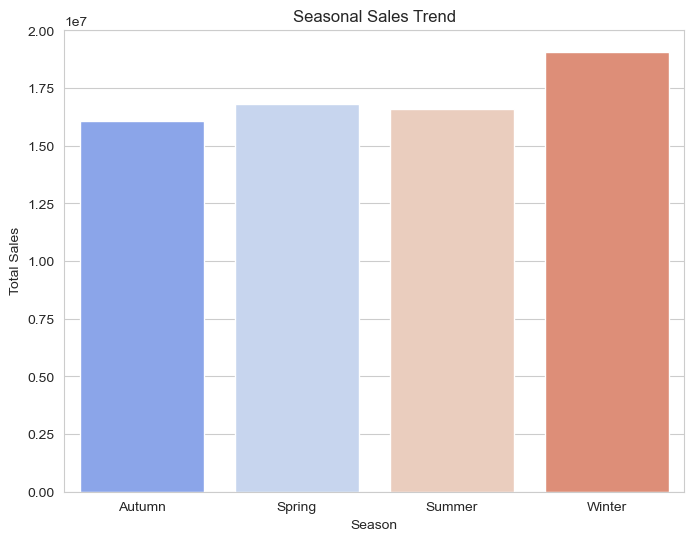

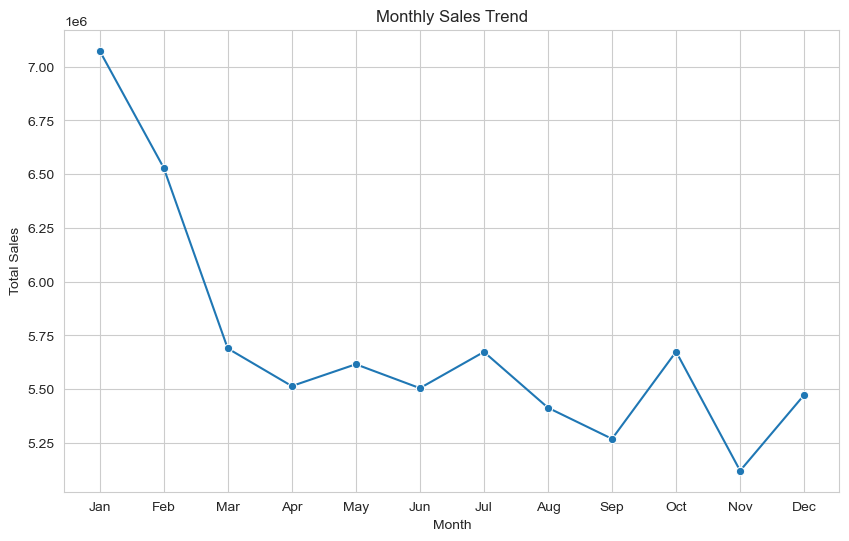

In [88]:
#Plotting Both Monthly and Seasonal Trends
plt.figure(figsize=(8, 6))
sns.barplot(x='Season', y='price', data=seasonal_sales, palette='coolwarm')
plt.title('Seasonal Sales Trend')
plt.xlabel('Season')
plt.ylabel('Total Sales')
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='price', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

1. Seasonal Trends: People tends to buy more in Winter and Spring because its festival time like Ramadan or Christmas.
2. Monthly Trends: As we can see the graph is in downwards trend this is because of the Covid Pandemic which rises from year 2021 to 2023

In [89]:
# Customer Demographics by Mall: Analyze if certain malls attract specific demographics (age, gender). 

In [90]:
mall_demographics = data.groupby(['shopping_mall', 'gender', 'Age Group']).size().reset_index(name='Customer_Count')
# Grouping the data by Mall Location, Gender, and Age_Group 
# which gives the count of customers in each demographic segment at each mall.

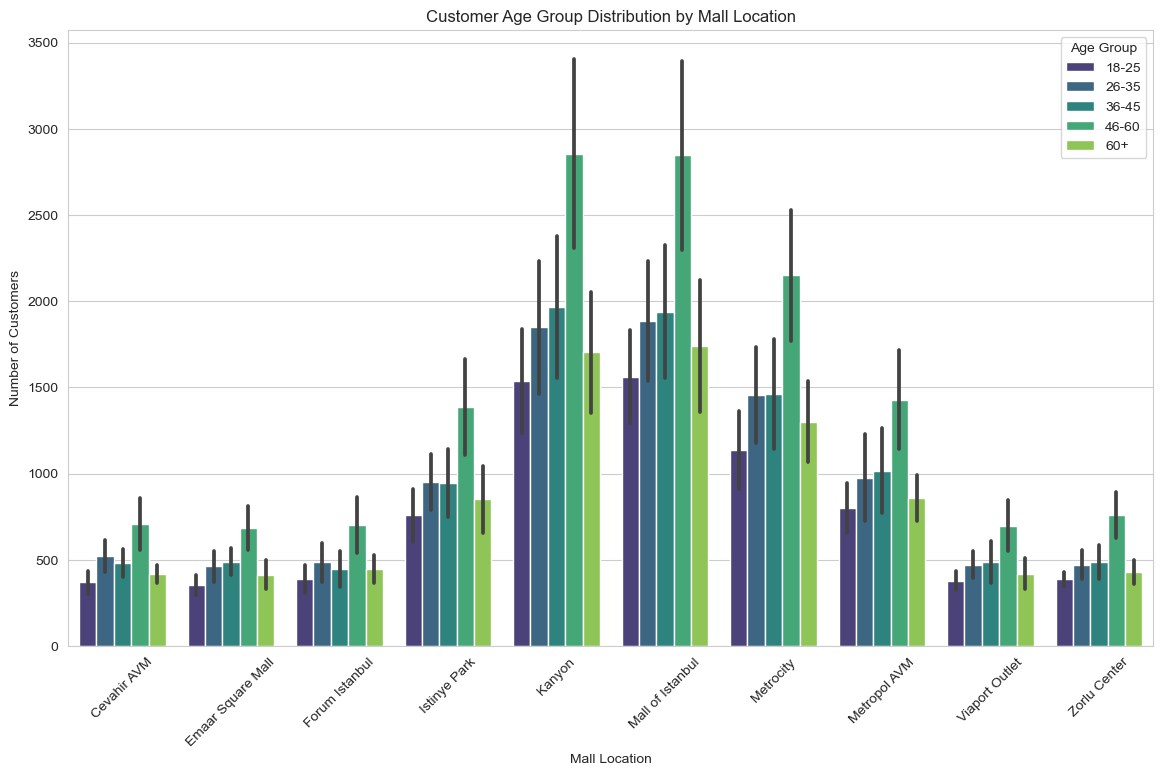

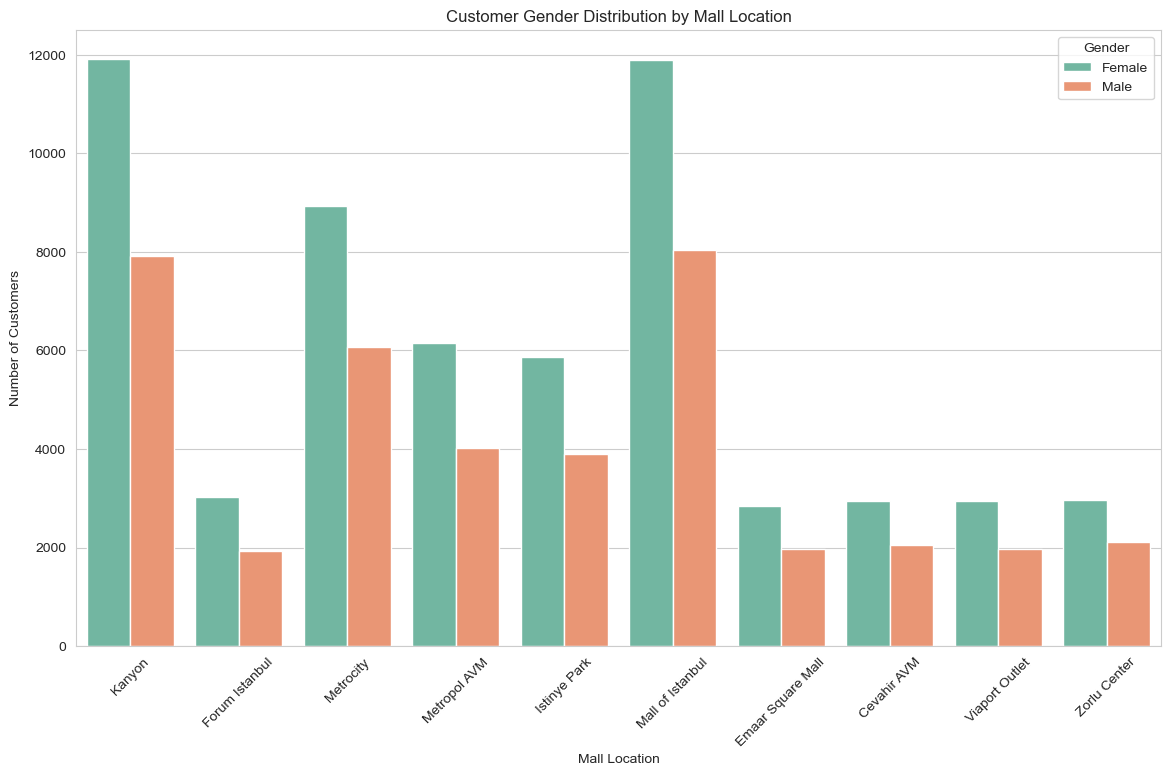

In [91]:
#Visualize Age Group Distribution by Mall
plt.figure(figsize=(14, 8))
sns.barplot(x='shopping_mall', y='Customer_Count', hue='Age Group', data=mall_demographics, palette='viridis')
plt.title('Customer Age Group Distribution by Mall Location')
plt.xlabel('Mall Location')
plt.ylabel('Number of Customers')
plt.legend(title='Age Group')
plt.xticks(rotation=45)
plt.show()

#Visualize Gender Distribution by Mall:
plt.figure(figsize=(14, 8))
sns.countplot(x='shopping_mall', hue='gender', data=data, palette='Set2')
plt.title('Customer Gender Distribution by Mall Location')
plt.xlabel('Mall Location')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()



1. Age Group: People in age group 46-60 prefer the 2 malls i.e. Kanyon & Mall Of Istanbul
2. Gender: Although females buy more but there are 3 malls which attract male customers amoung the rest which are Kanyon, Metrocity, & Mall Of Istanbul.

In [92]:
# Top-Selling Categories: Identify which product categories have the highest quantity sold and revenue. 

In [93]:
# Calculate Revenue for Each Product Create a new column called Revenue by multiplying Quantity by Price. 
# This will allow us to analyze both quantity sold and revenue.

data['Revenue'] = data['quantity'] * data['price']

In [94]:
# Group Data by Product Category and Mall Location Group the data by Product_Category and Mall_Location,
# and calculate the total Quantity and Revenue for each product category across each mall. 
category_sales = data.groupby(['category', 'shopping_mall']).agg({
    'quantity': 'sum',
    'Revenue': 'sum'
}).reset_index()


In [95]:
# Identify Top-Selling Product Categories
# Sort by total Quantity to get top-selling categories
top_categories_by_quantity = category_sales.sort_values(by='quantity', ascending=False)

# Sort by Revenue to get top-grossing categories
top_categories_by_revenue = category_sales.sort_values(by='Revenue', ascending=False)


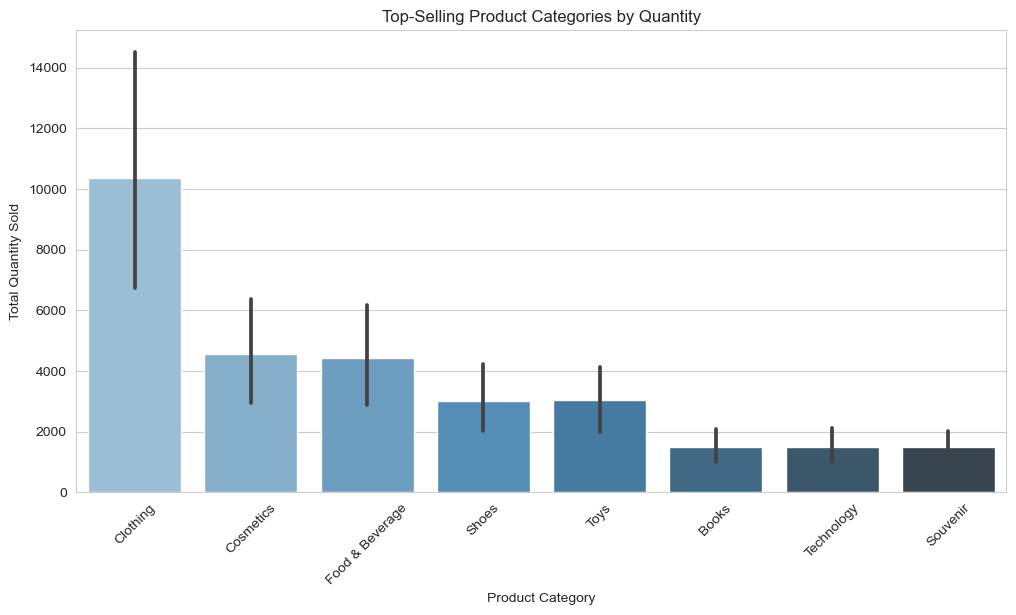

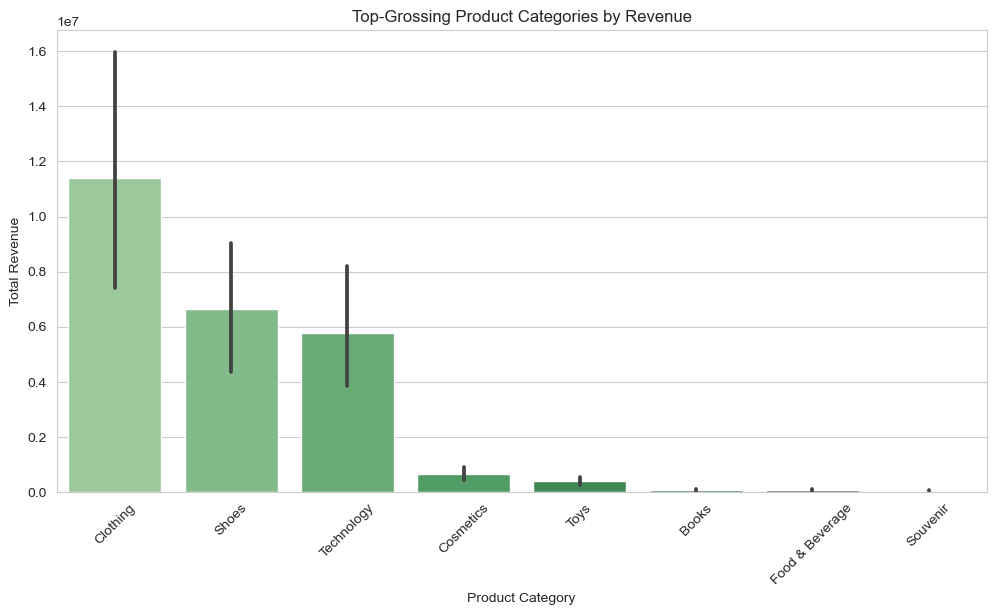

In [96]:
# Visualize Top Categories by Quantity Sold 
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='quantity', data=top_categories_by_quantity, palette='Blues_d')
plt.title('Top-Selling Product Categories by Quantity')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.show()

# Visualize Top Categories by Revenue
plt.figure(figsize=(12, 6))
sns.barplot(x='category', y='Revenue', data=top_categories_by_revenue, palette='Greens_d')
plt.title('Top-Grossing Product Categories by Revenue')
plt.xlabel('Product Category')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

1. Top-Selling Categories: After plotting the bar graphs, we find that certain product categories like "Clothing", "Cosmetic" & "Food & Beverages" are the top sellers by quantity. This indicates high customer interest in these categories.
2. Top-Grossing Categories: Categories like "Clothing", "Shoes" and "Technology" might have lower quantities sold but higher revenue, indicating that these are high-value items even if they are purchased less frequently.

"Clothing is the only category which not only have high selling quantity but also generates more revenue then any other category."


In [97]:
# Average Transaction Value
# Calculate the average transaction value across different product categories, demographics, and mall locations.

In [98]:
# Calculate the Average Transaction Value (ATV) Across Different Dimensions

In [120]:
# ATV by Product Category
# To calculate the average transaction value by each product category,
# group the data by category and calculate the mean of Price
# Average Transaction Value by Product Category
atv_by_category = data.groupby('category')['price'].mean().reset_index()
print(atv_by_category)

          category        price
0            Books    45.568621
1         Clothing   901.084021
2        Cosmetics   122.448626
3  Food & Beverage    15.671948
4            Shoes  1807.388568
5         Souvenir    34.894345
6       Technology  3156.935548
7             Toys   107.733185


In [121]:
# ATV by Demographics (Age Group and Gender)
# To analyze ATV based on demographics, group the data by Age_Group and Gender.
# Average Transaction Value by Age Group and Gender
atv_by_age_gender = data.groupby(['Age Group', 'gender'])['price'].mean().reset_index()
print(atv_by_age_gender)

  Age Group  gender       price
0     18-25  Female  693.770134
1     18-25    Male  660.180352
2     26-35  Female  680.921098
3     26-35    Male  697.090688
4     36-45  Female  693.133482
5     36-45    Male  710.331101
6     46-60  Female  688.613231
7     46-60    Male  687.279063
8       60+  Female  684.661061
9       60+    Male  696.495534


In [125]:
# ATV by Mall Location
# To calculate the ATV by mall location, group by Mall_Location.
# Average Transaction Value by Mall Location
atv_by_location = data.groupby('shopping_mall')['price'].mean().reset_index()
print(atv_by_location)

       shopping_mall       price
0        Cevahir AVM  687.972719
1  Emaar Square Mall  704.720081
2     Forum Istanbul  674.363012
3       Istinye Park  686.747525
4             Kanyon  691.658944
5   Mall of Istanbul  694.566395
6          Metrocity  682.831262
7       Metropol AVM  682.806120
8     Viaport Outlet  694.753655
9       Zorlu Center  691.556457


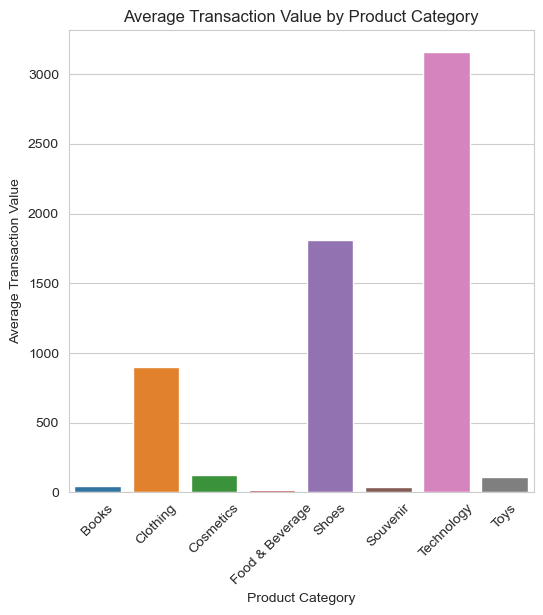

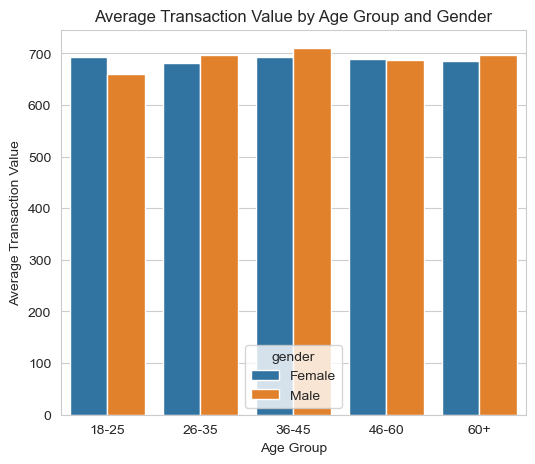

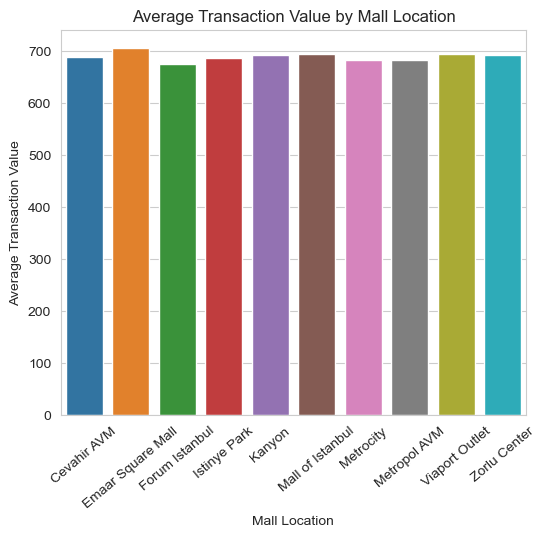

In [140]:
# Visualize the Results 
# Bar Plot for ATV by Product Category
plt.figure(figsize=(6, 6))
sns.barplot(data=atv_by_category, x='category', y='price')
plt.title("Average Transaction Value by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Transaction Value")
plt.xticks(rotation=45)
plt.show()

# Plot for Average Transaction Value by Age Group and Gender
plt.figure(figsize=(6, 5))
sns.barplot(data=atv_by_age_gender, x='Age Group', y='price', hue='gender')
plt.title("Average Transaction Value by Age Group and Gender")
plt.xlabel("Age Group")
plt.ylabel("Average Transaction Value")
plt.show()


# Plot for Average Transaction Value by Mall Location
plt.figure(figsize=(6, 5))
sns.barplot(data=atv_by_location, x='shopping_mall', y='price')
plt.title("Average Transaction Value by Mall Location")
plt.xlabel("Mall Location")
plt.ylabel("Average Transaction Value")
plt.xticks(rotation=40)
plt.show()



By Product Category: Technology, Shoes & clothing have the highest ATV which mean in these categories indicates that these categories are likely contributing significantly to revenue, and customers are comfortable with higher spending in these areas. This insight can help with strategic decisions around inventory, pricing, promotions, and cross-selling opportunities.

By Age Group and Gender:
1. 18-25: Young adult females are likely to make higher-value purchases, possibly indicating a preference for certain categories such as fashion, cosmetics, lifestyle products, or electronics.
2. 26-35: Young adult males in this age group might have a high disposable income and are willing to spend on higher-value items. Common high-ATV categories for this group could include electronics, gadgets, sports equipment, or premium clothing.
3. 36-45: Males in their mid-30s to mid-40s are likely in their peak earning years, often purchasing high-value items for personal use or family needs. This group may spend on products related to home improvement, technology, or family-oriented products.
4. 46-60: The fact that both genders have a high ATV in this age range suggests that people in this group may have stable incomes and disposable income to spend on premium items, leisure products, or investments in health-related goods.
5. 60+ : Older males are spending more per transaction, possibly due to a focus on quality or premium items rather than quantity. This demographic might also prefer well-established brands and trusted products.

By Mall Location: A higher ATV at Emaar Square Mall likely reflects a combination of factors, such as a more affluent customer base, a higher proportion of premium products, or an upscale shopping environment. 